# mnist_GridSearchCV


# 索引
[載入MNIST數據集](#載入MNIST數據集)

[以支持向量機實作分類數字圖片](#以支持向量機實作分類數字圖片)

[觀測結果](#觀測結果)

[以網格搜尋微調機器學習模型](#以網格搜尋微調機器學習模型)

## 載入MNIST數據集

In [4]:
import numpy as np
mnist = np.load('/content/drive/MyDrive/成成/python視覺辨識與機器學習/Day4/mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
X_train, y_train, X_test, y_test = [mnist[f] for f in ['X_train', 'y_train',
                                    'X_test', 'y_test']]

del mnist

X_train.shape

(60000, 784)

## 以支持向量機實作分類數字圖片

In [6]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

In [7]:
from sklearn.metrics import r2_score

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 0.956, test: 0.868


## 觀測結果

In [8]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)

        ax.imshow(np.reshape(images[idx],(28, 28)),
                  cmap='binary')

        title= "label=" +str((labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

y_test_pred :  [7 2 1 0 4 1 4 9 6 9]
y_test :  [7 2 1 0 4 1 4 9 5 9]


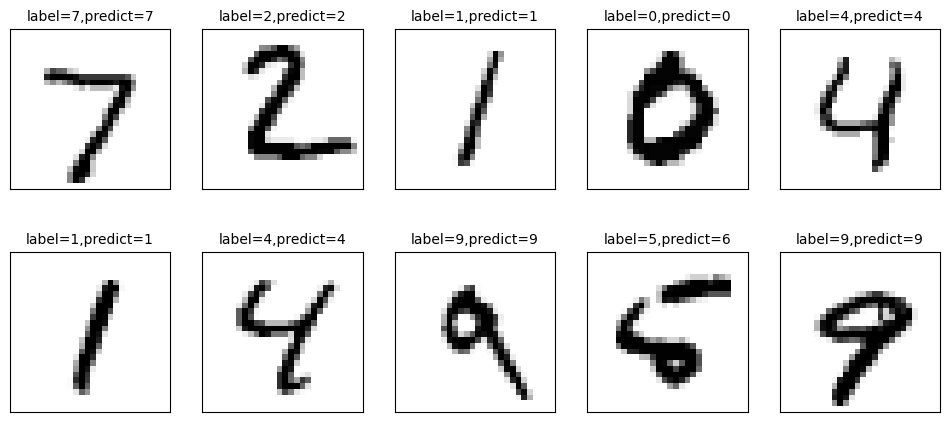

In [9]:
print('y_test_pred : ',y_test_pred[:10] )
print('y_test : ',y_test[:10] )
plot_images_labels_prediction(X_test,
                              y_test,
                              y_test_pred,0)

## 以網格搜尋微調機器學習模型

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10 )
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)